In [1]:
import numpy as np
import os
import cv2
import random

In [2]:
main = "/home/second/Desktop/TB_Chest_Radiography_Database"
normal = "/home/second/Desktop/TB_Chest_Radiography_Database/Normal/"
tuberculosis = "/home/second/Desktop/TB_Chest_Radiography_Database/Tuberculosis/"

In [3]:
print("length of normal dataset",len(normal))
print("length of tuberculosis dataset",len(tuberculosis))
print("no. of tuberculosis images :" ,len(os.listdir(tuberculosis)))
print("\nno. of normal images :" ,len(os.listdir(normal)))

length of normal dataset 58
length of tuberculosis dataset 64
no. of tuberculosis images : 700

no. of normal images : 3500


In [4]:
import tensorflow
from keras.utils import to_categorical

Labels = ["Normal", "Tuberculosis"]
image_size = 520

def stand_size():
    data = []
    for label in Labels:
        path = os.path.join(main, label)
        class_ind = Labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                complement = cv2.bitwise_not(img_array)
                resized_arr = cv2.resize(complement, (image_size, image_size))
                data.append([resized_arr, class_ind])
            except Exception as e:
                print(e)
    # Convert labels to one-hot encoding
    X = np.array([item[0] for item in data])
    y = np.array([item[1] for item in data])
    y = to_categorical(y, num_classes=len(Labels))
    return X, y

2023-04-23 12:42:56.274752: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 12:42:56.329352: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 12:42:56.330103: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 12:43:39.169631: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
stand_size()

(array([[[[208, 208, 208],
          [217, 217, 217],
          [223, 223, 223],
          ...,
          [196, 196, 196],
          [194, 194, 194],
          [191, 191, 191]],
 
         [[209, 209, 209],
          [217, 217, 217],
          [224, 224, 224],
          ...,
          [209, 209, 209],
          [207, 207, 207],
          [205, 205, 205]],
 
         [[210, 210, 210],
          [217, 217, 217],
          [225, 225, 225],
          ...,
          [218, 218, 218],
          [216, 216, 216],
          [213, 213, 213]],
 
         ...,
 
         [[236, 236, 236],
          [237, 237, 237],
          [237, 237, 237],
          ...,
          [225, 225, 225],
          [218, 218, 218],
          [207, 207, 207]],
 
         [[233, 233, 233],
          [234, 234, 234],
          [234, 234, 234],
          ...,
          [224, 224, 224],
          [217, 217, 217],
          [207, 207, 207]],
 
         [[231, 231, 231],
          [232, 232, 232],
          [232, 232, 232],
   

In [6]:
train_dir = os.path.join(main, 'train')
test_dir = os.path.join(main, 'test')
validation_dir = os.path.join(main, 'validation')

if not os.path.exists(main):
    os.mkdir(main)
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
if os.path.exists(validation_dir) or os.path.exists(main) or os.path.exists(train_dir):
    pass

In [7]:
train_percentage = 0.7
test_percentage = 0.0
validation_percentage = 0.3

In [14]:
import shutil

for cat in Labels:
    cat_dir = os.path.join(main,cat)

    os.makedirs(os.path.join(train_dir, cat))
    os.makedirs(os.path.join(test_dir, cat))
    os.makedirs(os.path.join(validation_dir, cat))

    image_files = [f for f in os.listdir(cat_dir) if f.endswith('.png')]

    random.shuffle(image_files)

    num_images = len(image_files)
    num_train = int(num_images * train_percentage)
    num_test = int(num_images * test_percentage)
    num_validation = num_images - num_train - num_test

    train_files = image_files[:num_train]
    test_files = image_files[num_train:num_train+num_test]
    validation_files = image_files[num_train+num_test:]

    for filename in train_files:
        src = os.path.join(cat_dir, filename)
        dst = os.path.join(train_dir, cat, filename)
        shutil.copyfile(src, dst)

    for filename in test_files:
        src = os.path.join(cat_dir, filename)
        dst = os.path.join(test_dir, cat, filename)
        shutil.copyfile(src, dst)

    for filename in validation_files:
        src = os.path.join(cat_dir, filename)
        dst = os.path.join(validation_dir, cat, filename)
        shutil.copyfile(src, dst)

In [15]:

from keras.preprocessing.image import ImageDataGenerator

imageDataGenerator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [16]:
train_gen = imageDataGenerator.flow_from_directory(
    train_dir,
    target_size = (200, 200),
     batch_size = 12,
     shuffle=True,
     class_mode = 'binary',
)
test_gen = imageDataGenerator.flow_from_directory(
    test_dir,
    target_size = (200, 200),
     batch_size = 12,
     shuffle=True,
     class_mode = 'binary',
)
val_gen = imageDataGenerator.flow_from_directory(
    validation_dir,
    target_size = (200, 200),
     batch_size = 12,
     shuffle=True,
     class_mode = 'binary',
)

Found 2520 images belonging to 2 classes.
Found 840 images belonging to 2 classes.
Found 840 images belonging to 2 classes.


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from PIL import Image


In [18]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(200,200,3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(200,200,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(filters=192, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=192, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 198, 198, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 196, 196, 32)      9248      
                                                                 
 batch_normalization_9 (Batc  (None, 196, 196, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                      

In [45]:
import numpy as np
from sklearn.utils import compute_class_weight

# Assume you have your training data loaded in X and y arrays
class_labels = np.unique(y)
class_weights = compute_class_weight('balanced', class_labels, y)

print("Class labels: ", class_labels)
print("Class weights: ", class_weights)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_19689/1366526349.py", line 5, in <module>
    class_labels = np.unique(y)
NameError: name 'y' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1199, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1052, in structured_traceb

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_19689/751519327.py", line 1, in <module>
    class_weights = (train_dir.value_counts() / len(train_dir)).to_dict()
AttributeError: 'str' object has no attribute 'value_counts'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1199, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/usr/local/lib/python3.8/dist

/tmp/ipykernel_19689/2349574671.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


Epoch 1/10


2023-04-23 12:50:40.115319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


210/210 [==============================] - ETA: 0s - loss: 0.3667 - accuracy: 0.9163

2023-04-23 13:04:38.342137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


210/210 [==============================] - 902s 4s/step - loss: 0.3667 - accuracy: 0.9163 - val_loss: 0.1930 - val_accuracy: 0.9202
Epoch 2/10
210/210 [==============================] - 886s 4s/step - loss: 0.1928 - accuracy: 0.9345 - val_loss: 1.2348 - val_accuracy: 0.8036
Epoch 3/10
210/210 [==============================] - 872s 4s/step - loss: 0.2008 - accuracy: 0.9353 - val_loss: 0.2725 - val_accuracy: 0.8988
Epoch 4/10
210/210 [==============================] - 579s 3s/step - loss: 0.1452 - accuracy: 0.9500 - val_loss: 1.6955 - val_accuracy: 0.6238
Epoch 5/10
210/210 [==============================] - 780s 4s/step - loss: 0.1602 - accuracy: 0.9452 - val_loss: 0.3975 - val_accuracy: 0.8940
Epoch 6/10
210/210 [==============================] - 609s 3s/step - loss: 0.1457 - accuracy: 0.9472 - val_loss: 0.3738 - val_accuracy: 0.9476
Epoch 7/10
210/210 [==============================] - 554s 3s/step - loss: 0.1719 - accuracy: 0.9472 - val_loss: 19.0014 - val_accuracy: 0.1726
Epoch 8/1

/tmp/ipykernel_19689/2349574671.py:9: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_gen, steps=len(test_gen))
2023-04-23 14:56:17.613477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Test accuracy: 0.9559524059295654


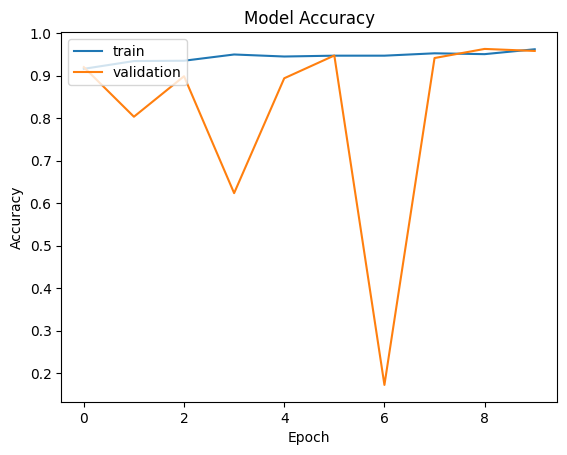

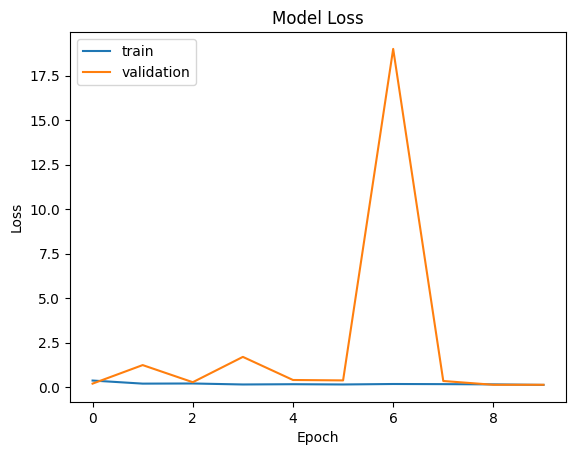

In [19]:
# train the model
history = model.fit_generator(train_gen,
                              steps_per_epoch=len(train_gen),
                              epochs=10,
                              validation_data=val_gen,
                              validation_steps=len(val_gen))

# evaluate the model on the test set
test_loss, test_acc = model.evaluate_generator(test_gen, steps=len(test_gen))
print('Test accuracy:', test_acc)

# plot the training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
model.save("tuberculosis_model.h5")


In [22]:
from keras.models import load_model
model = load_model("tuberculosis_model.h5")

# Load the test image
img = cv2.imread("/home/second/Downloads/test1.jpeg")
img = cv2.resize(img, (200, 200))

# Preprocess the image
img = img.astype(np.float32) / 255.0
img = np.expand_dims(img, axis=0)

# Make a prediction
pred = model.predict(img)

# Print the predicted class
if pred > 0.5:
    print("Tuberculosis")
else:
    print("Normal")


1/1 [==============================] - 0s 255ms/step
Tuberculosis


In [32]:


# Test the model with an unseen image
img = cv2.imread("/home/second/Downloads/Normal-3.png")
complement = cv2.bitwise_not(img)
resized_img = cv2.resize(complement, (200, 200))
resized_img = np.expand_dims(resized_img, axis=0)
prediction = model.predict(resized_img)
if prediction > 0.5:
    print("Tuberculosis")
else:
    print("Normal")

1/1 [==============================] - 1s 505ms/step
Tuberculosis


In [36]:
from keras.applications.resnet import preprocess_input,ResNet50,decode_predictions
import keras.utils as image



def classify(img_path):
    imgs = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(imgs)

    img_batch = np.expand_dims(img_array, axis=0)

    img_preprocessed = preprocess_input(img_batch)

    model = ResNet50()
    prediction = model.predict(img_preprocessed)

    print(decode_predictions(prediction, top=3)[0])

classify("/home/second/Downloads/Normal-3.png")

35363/35363 [==============================] - 0s 0us/step
[('n03388043', 'fountain', 0.13040411), ('n03544143', 'hourglass', 0.11519433), ('n04040759', 'radiator', 0.07068493)]
